# Assignment 2 Part B

## Harmony Heals 

### Project by RAS (Group 45)
- Rohan Britto (Student ID: 24610990)
- Aaditya Deshmukh (Student ID: 14334864)
- Smit Khatri (Student ID: 24712248)

In [3]:
# importing the necessary packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import svd
import seaborn as sns

In [4]:
songs=pd.read_csv('Datasets/final.csv')

In [5]:
# shape of the dataset
songs.shape

(15084, 12)

In [6]:
songs.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics
0,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,St. Anger 'round my neck\nSt. Anger 'round my ...
1,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,"Legendary, Runners, you know me, o ooooh, o oo..."
2,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,"Road runner, road runner\nGoing hundred miles ..."
3,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,I don't need your forgiveness\nI don't need yo...
4,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal,"One, two, three, go\n\nBroken\nYeah, you been ..."


In [7]:
songs.columns

Index(['lastfm_url', 'track', 'artist', 'seeds', 'number_of_emotion_tags',
       'valence_tags', 'arousal_tags', 'dominance_tags', 'mbid', 'spotify_id',
       'genre', 'lyrics'],
      dtype='object')

In [8]:
#changing the column order 
songs=songs[['lyrics', 'track',  'artist', 'genre','seeds', 'valence_tags', 'arousal_tags', 'dominance_tags', 'number_of_emotion_tags']]

In [9]:
# number of unique variables
songs.nunique()

lyrics                    14927
track                     14254
artist                     5444
genre                       340
seeds                      3386
valence_tags               7785
arousal_tags               7424
dominance_tags             7481
number_of_emotion_tags       36
dtype: int64

In [10]:
# check for the duplicate songs
songs[songs.duplicated(subset=['lyrics', 'track'])]

,lyrics,track,artist,genre,seeds,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags
2363,What do you desire?\nWhat do you desire?\nIf m...,Live Life Now,Cheryl Cole,electronic,['fierce'],3.050000,5.045000,4.550000,2
2467,"When the song come on in the club\nPut it up, ...",Work (Poker Face Club Mix),Ciara feat. Missy Elliott,NaN,['fierce'],4.000000,5.700000,5.700000,1
4416,Down in my loneliness emptiness rins down the ...,Surprise,robby maria & the silent revolution,singer-songwriter,['apocalyptic'],6.293333,5.273333,4.433333,3
4672,"Have mercy on me, sir,\nAllow me to impose on ...",Song of Joy,Nick Cave & The Bad Seeds,alternative,"['dark', 'halloween', 'nocturnal']",3.841630,4.157935,3.844783,4
8780,"Lonely, lonely, lonely\nLonely, lonely, lonely...",Lonely (없구나),비원에이포 (B1A4),k-pop,['lonely'],2.670000,4.370000,3.330000,1
11379,"I know that it is freezing, but I think we hav...",Lua,Conor Oberst/Gillian Welch,indie,['intimate'],6.950000,4.415000,6.645000,2
11939,When i wake up in the morning\nI feel down\nI ...,Deeper,Attica Blues,trip-hop,['lazy'],4.430000,3.463333,5.316667,3
12034,For all we know\nWe may never meet again\nBefo...,For All We Know,Dexter Gordon,jazz,['lazy'],5.780000,3.660000,6.413333,3
12202,"Well, that big dumb blonde\nWith her wheel in ...",Million Dollar Bash,Tokyo Bob,rhythm and blues,['lazy'],3.050000,3.050000,5.790000,1
14217,Been brought to new heights of courtship\nThe ...,I Am My Beloved's,Danielson Famile,alternative,['sarcastic'],4.240000,5.190000,5.350000,1


In [11]:
#shape of duplicate records
songs[songs.duplicated(subset=['lyrics', 'track'])].shape

(11, 9)

In [12]:
#duplicate recrod check
songs.loc[songs['track']=='For All We Know', ]

,lyrics,track,artist,genre,seeds,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags
7772,For all we know\nWe may never meet again\nBefo...,For All We Know,Nina Simone,jazz,['bleak'],3.30,3.82,4.347500,4
12034,For all we know\nWe may never meet again\nBefo...,For All We Know,Dexter Gordon,jazz,['lazy'],5.78,3.66,6.413333,3


In [13]:
# droping the duplicate records
songs.drop_duplicates(subset=['lyrics', 'track'], inplace=True)

In [14]:
#null value check 
songs.isnull().sum()

lyrics                      0
track                       0
artist                      0
genre                     564
seeds                       0
valence_tags                0
arousal_tags                0
dominance_tags              0
number_of_emotion_tags      0
dtype: int64

In [15]:
#records containing null values 
songs[songs.isnull().any(axis=1)]

,lyrics,track,artist,genre,seeds,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags
358,"No smoking, we aint having that,\nYou gotta ge...",Blaze,Monoxide,NaN,['aggressive'],3.080000,5.8700,5.490000,1
397,If you think it's too loud\nBitch - get the fu...,Raise Hell,(hed) Planet Earth,NaN,['aggressive'],1.540000,2.9350,2.745000,3
591,There's a cold wind blowing through my head\nI...,Ghosts,Juliette Lewis,NaN,['aggressive'],3.080000,5.8700,5.490000,1
682,"From ancient Yuggoth, black rays emit\nEvils n...",Weird Tales : Electric Frost/Golgotha/Altar Of...,Electric Wizard,NaN,"['aggressive', 'cathartic', 'brooding', 'wistf...",2.123333,3.2900,3.223333,5
744,You see me walking away\nWhat more could I say...,Hands and Knees,Ünloco,NaN,['aggressive'],3.080000,5.8700,5.490000,1
...,...,...,...,...,...,...,...,...,...
14737,"Stay still, be still\nNo wonder you are always...",Messenger,Blonde Redhead/David Sylvian,NaN,"['cathartic', 'brooding']",4.408750,3.7775,4.035000,8
14748,I see you drivin' round town\nWith the girl I ...,F_k You,Cee Lo Green,NaN,"['cathartic', 'exciting']",3.975000,3.4750,3.605000,2
14840,"Turn around wake a little\nHowlin', save the l...",To Believe,The Cinematic Orchestra,NaN,['dramatic'],5.170000,6.5900,4.770000,1
14916,"Before you know, I'm swept away.\nWatching my ...","I, Manface",Man Man,NaN,['dramatic'],6.445000,6.3200,5.800000,2


In [16]:
# dropping the null values 
songs.dropna( inplace=True)

In [17]:
# checking the variable types
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14509 entries, 0 to 15083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lyrics                  14509 non-null  object 
 1   track                   14509 non-null  object 
 2   artist                  14509 non-null  object 
 3   genre                   14509 non-null  object 
 4   seeds                   14509 non-null  object 
 5   valence_tags            14509 non-null  float64
 6   arousal_tags            14509 non-null  float64
 7   dominance_tags          14509 non-null  float64
 8   number_of_emotion_tags  14509 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.1+ MB


In [18]:
#resetting the index of the dataset after dropping the null values of the dataset
songs.reset_index(drop=True, inplace=True)

In [19]:
# creating new column containing unique value for each song same as row index of the dataset
songs.insert(0, "item_id", songs.index.values)

In [20]:
songs.head(20)

,item_id,lyrics,track,artist,genre,seeds,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags
0,0,St. Anger 'round my neck\nSt. Anger 'round my ...,St. Anger,Metallica,metal,['aggressive'],3.710000,5.833000,5.427250,8
1,1,"Legendary, Runners, you know me, o ooooh, o oo...",Speedin',Rick Ross,rap,['aggressive'],3.080000,5.870000,5.490000,1
2,2,"Road runner, road runner\nGoing hundred miles ...",Bamboo Banga,M.I.A.,hip-hop,"['aggressive', 'fun', 'sexy', 'energetic']",6.555071,5.537214,5.691357,13
3,3,I don't need your forgiveness\nI don't need yo...,Die MF Die,Dope,metal,['aggressive'],3.771176,5.348235,5.441765,7
4,4,"One, two, three, go\n\nBroken\nYeah, you been ...",Step Up,Drowning Pool,metal,['aggressive'],2.971389,5.537500,4.726389,9
5,5,"Ayy, y'all heard about the good news?\nY'all s...",Feedback,Kanye West,hip-hop,['aggressive'],3.080000,5.870000,5.490000,1
6,6,"I'll never be the same, breaking decency\nDon'...",7 Words,Deftones,nu metal,"['aggressive', 'angry']",3.807121,5.473939,4.729091,10
7,7,You wanna make me sick\nYou wanna lick my woun...,Limp,Fiona Apple,singer-songwriter,"['aggressive', 'angry', 'bitter']",3.737211,5.610204,4.626735,20
8,8,"Watch your back, so you won't stab mine\nGet i...",Sweet Amber,Metallica,metal,['aggressive'],3.582759,5.757241,5.340000,4
9,9,"Right here, all by myself\nI ain't got no one ...",Depression,Black Flag,punk,['aggressive'],3.259444,5.203056,4.422778,9


In [21]:
# converting the genre column in dummies 
genre_dummies=pd.get_dummies(songs['genre'])

In [22]:
##genre dummies 
genre_dummies.shape

(14509, 340)

In [23]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14509 entries, 0 to 14508
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   item_id                 14509 non-null  int64  
 1   lyrics                  14509 non-null  object 
 2   track                   14509 non-null  object 
 3   artist                  14509 non-null  object 
 4   genre                   14509 non-null  object 
 5   seeds                   14509 non-null  object 
 6   valence_tags            14509 non-null  float64
 7   arousal_tags            14509 non-null  float64
 8   dominance_tags          14509 non-null  float64
 9   number_of_emotion_tags  14509 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [24]:
from ast import literal_eval
songs['seeds'] = songs['seeds'].apply(literal_eval)

In [25]:
# transforming nested column into dummies.
seeds_dummies = pd.get_dummies(songs['seeds'].apply(pd.Series).stack()).sum(level=0)
seeds_dummies.shape

(14509, 258)

In [26]:
#concatinating the genre and seeds to the songs dataset
songs = pd.concat([songs, genre_dummies, seeds_dummies], axis=1).drop(['genre', 'seeds'], axis=1)

In [27]:
songs

,item_id,lyrics,track,artist,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags,a cappella,acid jazz,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
0,0,St. Anger 'round my neck\nSt. Anger 'round my ...,St. Anger,Metallica,3.710000,5.833000,5.427250,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"Legendary, Runners, you know me, o ooooh, o oo...",Speedin',Rick Ross,3.080000,5.870000,5.490000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"Road runner, road runner\nGoing hundred miles ...",Bamboo Banga,M.I.A.,6.555071,5.537214,5.691357,13,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,I don't need your forgiveness\nI don't need yo...,Die MF Die,Dope,3.771176,5.348235,5.441765,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"One, two, three, go\n\nBroken\nYeah, you been ...",Step Up,Drowning Pool,2.971389,5.537500,4.726389,9,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,14504,Last Christmas\nI gave you my heart\nBut the v...,Bye Now,Atomic Kitten,5.170000,6.590000,4.770000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14505,14505,"Here's the tender coming, pressing all the men...",Here's The Tender Coming,The Unthanks,3.635000,5.040000,4.305000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
14506,14506,Only Living Soul:\nAcross the river from the s...,Only Living Soul,David Jordan,5.170000,6.590000,4.770000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14507,14507,"I see you,\nWatching me\nIf we don't speak\nWe...",Come Say Hello,Superhumanoids,5.170000,6.590000,4.770000,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### users rating data generation.|

In [28]:


import random

#x= number of users to be created
#i = number of records/ratings to be created 
#n = range of rating (0, 1, 2 ..)


x=1
rating_list=[]
column_names = []
for x in range(1,100):
    randomlist = []
    for i in range(0, songs.index[-1]+1):
        n = random.randint(1,10)
        randomlist.append(n)
    rating_list.append(randomlist)
    
    column_name = f"{x}"
    column_names.append(column_name)
    

users=pd.DataFrame()
for y in range (0,len(column_names)):
    users[column_names[y]]=rating_list[y]



#users = users.replace({2: np.nan})
#users = users.replace({3: np.nan})

In [29]:
users['1'].unique()

array([ 2,  8,  1,  6,  7,  3,  4,  5, 10,  9], dtype=int64)

In [30]:
# generating the null values in user rating data since not all songs were rated by the users. 

for x in range (6,11):
    users = users.replace({x: np.nan})

In [31]:
# creating the item_id column in songs rating data which has same values as the songs. 
# so that further we can join the songs rating data with songs data containing song lyrics and other variables

songs["item_id"]=songs.index.values
songs_ratings=pd.DataFrame()
songs_ratings['item_id']=songs['item_id']

In [32]:
users.shape

(14509, 99)

In [33]:
songs_ratings.shape

(14509, 1)

In [34]:
#joining the songs rating data to users data
songs_ratings=pd.concat([songs_ratings, users], axis=1)

In [35]:
# users rating for each song
# columns 1,2,3,4....99 are users
# the records are songs. 

songs_ratings

,item_id,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,1,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,...,2.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,4.0,NaN
2,2,1.0,3.0,1.0,NaN,5.0,NaN,NaN,1.0,2.0,...,4.0,NaN,2.0,NaN,3.0,NaN,4.0,NaN,3.0,2.0
3,3,NaN,NaN,NaN,4.0,NaN,NaN,1.0,1.0,3.0,...,2.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0
4,4,NaN,NaN,1.0,4.0,2.0,4.0,2.0,4.0,4.0,...,NaN,1.0,5.0,NaN,3.0,5.0,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,14504,NaN,NaN,4.0,4.0,2.0,1.0,2.0,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN
14505,14505,4.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,4.0,...,2.0,NaN,NaN,1.0,5.0,NaN,1.0,4.0,NaN,NaN
14506,14506,1.0,1.0,5.0,NaN,1.0,NaN,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,4.0,1.0,1.0
14507,14507,4.0,4.0,1.0,NaN,2.0,3.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,3.0,2.0


In [36]:
# converting the songs rating data into meaning ful dataframe. 

dataframes=[]
for q in songs_ratings.drop('item_id', axis=1).columns.to_list():
    data_1=songs_ratings[['item_id', q]].dropna()
    data_1['user_id']=data_1.columns[1]
    data_1.columns.values[1]="rating"
    dataframes.append(data_1)
    
songs_ratings = pd.concat(dataframes, axis=0, ignore_index=True)
songs_ratings=songs_ratings[['user_id', 'item_id', 'rating']].sort_values(['user_id'])

In [37]:
# updated version of songs rating data
songs_ratings.head(10)

,user_id,item_id,rating
0,1,0,2.0
4828,1,9688,5.0
4827,1,9684,4.0
4826,1,9682,3.0
4825,1,9678,2.0
4824,1,9677,3.0
4823,1,9676,5.0
4822,1,9671,2.0
4821,1,9670,5.0
4820,1,9669,5.0


In [38]:
# checking for the variable types of song data
songs_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717618 entries, 0 to 717617
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  717618 non-null  object 
 1   item_id  717618 non-null  int64  
 2   rating   717618 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.9+ MB


In [39]:
# making the user_id column integer 
songs_ratings['user_id']=songs_ratings['user_id'].astype('int64')

## Creating a non personalized recommender.

In [40]:
songs.head()

,item_id,lyrics,track,artist,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags,a cappella,acid jazz,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
0,0,St. Anger 'round my neck\nSt. Anger 'round my ...,St. Anger,Metallica,3.710000,5.833000,5.427250,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"Legendary, Runners, you know me, o ooooh, o oo...",Speedin',Rick Ross,3.080000,5.870000,5.490000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"Road runner, road runner\nGoing hundred miles ...",Bamboo Banga,M.I.A.,6.555071,5.537214,5.691357,13,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,I don't need your forgiveness\nI don't need yo...,Die MF Die,Dope,3.771176,5.348235,5.441765,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"One, two, three, go\n\nBroken\nYeah, you been ...",Step Up,Drowning Pool,2.971389,5.537500,4.726389,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#checking the shape of the songs rating dataset
songs_ratings.shape

(717618, 3)

In [42]:
#checking the shape of songs dataset
songs.shape

(14509, 606)

In [43]:
# joining the songs dataset with songs rating datset
songs_ratings_joint =pd.merge(songs_ratings, songs, how='left', on='item_id')

In [44]:

songs_ratings_joint.head()

,user_id,item_id,rating,lyrics,track,artist,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
0,1,0,2.0,St. Anger 'round my neck\nSt. Anger 'round my ...,St. Anger,Metallica,3.710000,5.833000,5.427250,8,...,0,0,0,0,0,0,0,0,0,0
1,1,9688,5.0,I couldn't sleep\nDidn't want comforting\nJust...,I Couldn't Sleep,Au Revoir Simone,7.217209,3.762907,6.537442,5,...,0,0,0,0,0,0,0,0,0,0
2,1,9684,4.0,"Georgia, Georgia\nIt's been many miles since I...","Georgia, Georgia",Elliott Smith,4.402946,4.001786,4.246250,6,...,0,0,0,0,0,0,0,0,0,0
3,1,9682,3.0,I couldn't sleep last night cause I tried to f...,The Haunted Man,Bat for Lashes,2.506667,1.633333,2.093333,2,...,0,0,0,0,0,0,0,0,0,0
4,1,9678,2.0,"Ooh, ooh, ooh\nLazy lover, Casanova\nYou roll ...",Lazy Lover,Brazilian Girls,7.115200,5.531760,6.147760,12,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#checking the shape of the new dataset after joining
songs_ratings_joint.shape

(717618, 608)

In [46]:
# grouping each song on the basis of the mean of rating given by the users and the count of the ratings
songs_agg=songs_ratings_joint.groupby('item_id').aggregate({'rating':['mean', 'count']})
songs_agg.columns=['Avg_rating', 'rating_count']
songs_agg.sort_values(['Avg_rating'],ascending=False,inplace=True)

In [47]:
# songs with the hihest rating in the decending order or average rating or each song
songs_agg

,Avg_rating,rating_count
item_id,,
10521,3.739130,46
3100,3.723404,47
12191,3.711111,45
2011,3.666667,45
7060,3.659574,47
...,...,...
9465,2.309524,42
5866,2.289474,38
9134,2.280702,57


<AxesSubplot:xlabel='rating_count', ylabel='Density'>

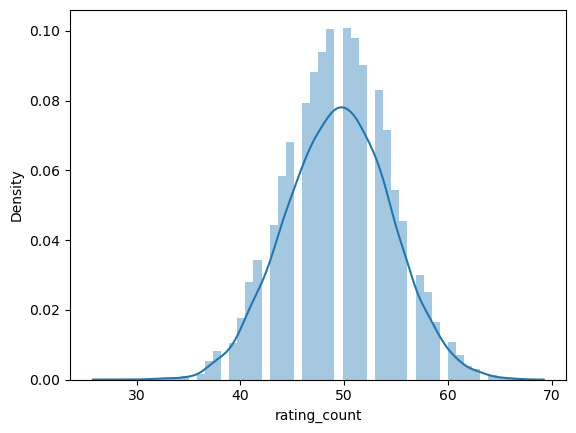

In [48]:
sns.distplot(songs_agg['rating_count'])

<AxesSubplot:xlabel='rating_count'>

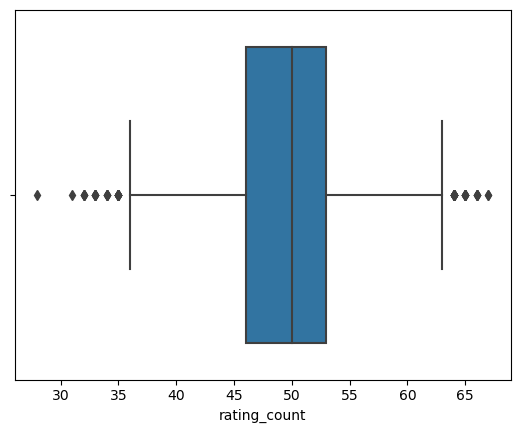

In [49]:
sns.boxplot(songs_agg['rating_count'])

In [50]:
#non -personalized recommendation engine with the filter of rating and rating count 
# with the help of the rating count and the average rating minimum threshod we can control the quality of the songs to be recommended

songs_agg.loc[(songs_agg['rating_count']>=55)& (songs_agg['Avg_rating']>=3.5)]

,Avg_rating,rating_count
item_id,,
7891,3.581818,55
12913,3.532258,62
6789,3.526316,57
9624,3.508772,57
11729,3.500000,56
12809,3.500000,56


## content based recommendation engine.

In [51]:
songs.head()

,item_id,lyrics,track,artist,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags,a cappella,acid jazz,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
0,0,St. Anger 'round my neck\nSt. Anger 'round my ...,St. Anger,Metallica,3.710000,5.833000,5.427250,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"Legendary, Runners, you know me, o ooooh, o oo...",Speedin',Rick Ross,3.080000,5.870000,5.490000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"Road runner, road runner\nGoing hundred miles ...",Bamboo Banga,M.I.A.,6.555071,5.537214,5.691357,13,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,I don't need your forgiveness\nI don't need yo...,Die MF Die,Dope,3.771176,5.348235,5.441765,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"One, two, three, go\n\nBroken\nYeah, you been ...",Step Up,Drowning Pool,2.971389,5.537500,4.726389,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# creating a new dataset having the useful column which has the songs characteristics and song id that is item id
songs_genre_seeds=pd.DataFrame(songs.iloc[:, 8:])

In [53]:
songs_genre_seeds.index=songs['item_id']

In [54]:
songs_genre_seeds.head()

,a cappella,acid jazz,acoustic,afrobeat,aggrotech,album rock,alternative,alternative country,alternative metal,alternative pop,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
item_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# fitting the model for finding the similarity between the songs in the songs_genre_seeds dataset

neighbours =NearestNeighbors(n_neighbors=100, n_jobs=-1, metric='cosine').fit(songs_genre_seeds)

In [56]:
### content based recommendation system. 
#depending upon the song the user is listening it will recommend the songs having similar characterisitcs
#the recommended songs will have higher valence number than the valence number of the song the user is currently listening 
# we can also control the rating and the rating counts of the songs for controlling the quality of the recommendations.

# for example lets consider if the user is listening the song having the item_id = 15


user_input_song_id =15#(item_id)
current_happiness = songs.loc[user_input_song_id,'valence_tags'] #(valence number of the respective item_id)
rating_cutoff=2.8 #controlling the quality of recommended songs by providing the average rating given by all users pool 

neighbors = neighbours.kneighbors(songs_genre_seeds[songs_genre_seeds.index==user_input_song_id])
similar_songs_index=neighbors[1].tolist()[0]
similar_songs=songs.loc[similar_songs_index,:]
reco_list=songs_agg.loc[similar_songs_index]
similar_songs=pd.merge(similar_songs, reco_list, how='left', on='item_id')
similar_songs=similar_songs.loc[(similar_songs['valence_tags']>current_happiness) & (similar_songs['Avg_rating']>rating_cutoff)].sort_values(by=['valence_tags','Avg_rating'], ascending=[True, False])
similar_songs=similar_songs[['track', 'lyrics', 'artist', 'valence_tags', 'Avg_rating', 'rating_count']]
similar_songs

,track,lyrics,artist,valence_tags,Avg_rating,rating_count
81,Here We Are Nowhere,Friday night's here\nWhat's the scene?\nNothin...,Stiff Little Fingers,3.326857,3.142857,56
36,No More,"No, I won't believe that this is all\nI'm not ...",Black Flag,3.507500,3.142857,42
9,Rocks Tonic Juice Magic,Let me take this awkward saw\nRun it against y...,Saves the Day,3.620909,2.956522,46
49,What's The Matter Man,What's hard to an alien man?\nWell you never k...,Rollins Band,3.848026,2.941176,51
13,Smile,Overwhelmed with a deep repulsion for sights s...,AFI,3.850000,3.086957,46
25,Padded Cell,"Earth's a padded cell, defanged and declawed\n...",Black Flag,3.984615,3.296296,54
92,You Know What You Are,"I tried to stick myself through, try to get to...",Nine Inch Nails,4.086596,3.104167,48
0,59 Times the Pain,The most intense of burning hells\nBlasting ex...,Hüsker Dü,4.096667,2.901961,51
24,Wasted Life,I could be a soldier\nGo out there and fight t...,Stiff Little Fingers,4.105882,2.942857,35
43,Rat Patrol,We could use those men in tan.\nYou say what d...,Naked Raygun,4.365000,2.977778,45


## item to item collaborative filtering

In [57]:
# creating the pivot table of songs rating joint table having columns of item id and records of user ids
songs_users_ratings_pivot=songs_ratings_joint.pivot_table(values = 'rating', index='user_id', columns='item_id')

In [58]:
songs_users_ratings_pivot

item_id,0,1,2,3,4,5,6,7,8,9,...,14499,14500,14501,14502,14503,14504,14505,14506,14507,14508
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,1.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN,...,NaN,NaN,NaN,4.0,3.0,NaN,4.0,1.0,4.0,5.0
2,NaN,NaN,3.0,NaN,NaN,5.0,5.0,3.0,4.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1.0,4.0,1.0
3,NaN,NaN,1.0,NaN,1.0,5.0,NaN,3.0,2.0,5.0,...,NaN,NaN,NaN,5.0,NaN,4.0,NaN,5.0,1.0,NaN
4,NaN,3.0,NaN,4.0,4.0,1.0,1.0,5.0,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
5,NaN,NaN,5.0,NaN,2.0,4.0,NaN,5.0,1.0,1.0,...,2.0,NaN,1.0,4.0,NaN,2.0,NaN,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,1.0,...,NaN,3.0,4.0,5.0,NaN,1.0,NaN,3.0,NaN,5.0
96,2.0,NaN,4.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,...,4.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
97,NaN,4.0,NaN,NaN,3.0,5.0,1.0,1.0,NaN,5.0,...,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,2.0,NaN


In [59]:
# calculating the mean rating given to songs of every user for normalizing the user rating 
user_rating_mean=np.nanmean(songs_users_ratings_pivot, axis=1)
user_rating_mean

array([3.00165929, 3.01799059, 3.01092669, 2.99451604, 2.98816731,
       2.99156177, 3.        , 2.99971961, 2.98760446, 3.02368958,
       2.97803706, 2.97594359, 3.01297992, 2.9745668 , 2.98839274,
       2.96641996, 3.00759354, 2.98747739, 2.99452954, 3.01050594,
       3.03753939, 2.99435106, 3.02325901, 2.99473392, 3.01243094,
       2.98196699, 2.97688988, 3.00466648, 2.97101846, 2.9803814 ,
       2.99708617, 2.97621024, 3.00838027, 2.99739262, 3.025967  ,
       3.00651782, 3.01297626, 3.00138236, 2.99077516, 3.01870702,
       3.00082079, 2.9965374 , 3.00954093, 3.00764207, 3.03600655,
       2.97725066, 3.00947867, 2.9960312 , 2.99086758, 2.98364261,
       2.97562664, 3.02381936, 3.02346645, 3.03600111, 3.00492005,
       3.01827567, 3.03196347, 3.01512418, 3.00148308, 2.9855888 ,
       3.0097904 , 2.98511371, 2.99229605, 3.01625792, 2.97244642,
       2.99903114, 3.00353309, 3.01069368, 2.97226377, 2.97772859,
       2.98106641, 2.97358797, 2.98624295, 2.9991882 , 3.00098

In [60]:
# transpose of the songs users rating pivot table 
songs_users_ratings_pivot.T

user_id,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
item_id,,,,,,,,,,,,,,,,,,,,,
0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,2.0,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,3.0,...,2.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,4.0,NaN
2,1.0,3.0,1.0,NaN,5.0,NaN,NaN,1.0,2.0,5.0,...,4.0,NaN,2.0,NaN,3.0,NaN,4.0,NaN,3.0,2.0
3,NaN,NaN,NaN,4.0,NaN,NaN,1.0,1.0,3.0,NaN,...,2.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0
4,NaN,NaN,1.0,4.0,2.0,4.0,2.0,4.0,4.0,NaN,...,NaN,1.0,5.0,NaN,3.0,5.0,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,NaN,NaN,4.0,4.0,2.0,1.0,2.0,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN
14505,4.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,4.0,5.0,...,2.0,NaN,NaN,1.0,5.0,NaN,1.0,4.0,NaN,NaN
14506,1.0,1.0,5.0,NaN,1.0,NaN,NaN,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,4.0,1.0,1.0


In [61]:
#normalizing the songs rating
#substracting the user rating mean from the user rating of each song for every respective user

songs_users_ratings_pivot_1=songs_users_ratings_pivot.T-user_rating_mean
songs_users_ratings_pivot_1

user_id,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
item_id,,,,,,,,,,,,,,,,,,,,,
0,-1.001659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.987604,NaN,...,-1.01103,1.99368,NaN,NaN,NaN,NaN,-0.998622,NaN,NaN,NaN
1,NaN,NaN,NaN,0.005484,NaN,-1.991562,NaN,NaN,NaN,-0.02369,...,-1.01103,0.99368,1.996696,-0.009663,NaN,NaN,NaN,0.986152,0.978218,NaN
2,-2.001659,-0.017991,-2.010927,NaN,2.011833,NaN,NaN,-1.99972,-0.987604,1.97631,...,0.98897,NaN,-1.003304,NaN,-0.012354,NaN,1.001378,NaN,-0.021782,-0.982609
3,NaN,NaN,NaN,1.005484,NaN,NaN,-2.0,-1.99972,0.012396,NaN,...,-1.01103,NaN,0.996696,NaN,NaN,NaN,1.001378,NaN,NaN,-1.982609
4,NaN,NaN,-2.010927,1.005484,-0.988167,1.008438,-1.0,1.00028,1.012396,NaN,...,NaN,-2.00632,1.996696,NaN,-0.012354,2.000548,NaN,-0.013848,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,NaN,NaN,0.989073,1.005484,-0.988167,-1.991562,-1.0,NaN,-1.987604,NaN,...,NaN,-2.00632,NaN,NaN,NaN,-1.999452,NaN,NaN,-0.021782,NaN
14505,0.998341,NaN,NaN,NaN,NaN,NaN,2.0,-1.99972,1.012396,1.97631,...,-1.01103,NaN,NaN,-2.009663,1.987646,NaN,-1.998622,0.986152,NaN,NaN
14506,-2.001659,-2.017991,1.989073,NaN,-1.988167,NaN,NaN,1.00028,-0.987604,NaN,...,NaN,NaN,NaN,NaN,1.987646,0.000548,-1.998622,0.986152,-2.021782,-1.982609


In [62]:
# filling the null values with zero 
songs_users_ratings_pivot_na_adj=songs_users_ratings_pivot_1.fillna(0)

In [63]:
songs_users_ratings_pivot_na_adj

user_id,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
item_id,,,,,,,,,,,,,,,,,,,,,
0,-1.001659,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,-1.987604,0.00000,...,-1.01103,1.99368,0.000000,0.000000,0.000000,0.000000,-0.998622,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.005484,0.000000,-1.991562,0.0,0.00000,0.000000,-0.02369,...,-1.01103,0.99368,1.996696,-0.009663,0.000000,0.000000,0.000000,0.986152,0.978218,0.000000
2,-2.001659,-0.017991,-2.010927,0.000000,2.011833,0.000000,0.0,-1.99972,-0.987604,1.97631,...,0.98897,0.00000,-1.003304,0.000000,-0.012354,0.000000,1.001378,0.000000,-0.021782,-0.982609
3,0.000000,0.000000,0.000000,1.005484,0.000000,0.000000,-2.0,-1.99972,0.012396,0.00000,...,-1.01103,0.00000,0.996696,0.000000,0.000000,0.000000,1.001378,0.000000,0.000000,-1.982609
4,0.000000,0.000000,-2.010927,1.005484,-0.988167,1.008438,-1.0,1.00028,1.012396,0.00000,...,0.00000,-2.00632,1.996696,0.000000,-0.012354,2.000548,0.000000,-0.013848,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,0.000000,0.000000,0.989073,1.005484,-0.988167,-1.991562,-1.0,0.00000,-1.987604,0.00000,...,0.00000,-2.00632,0.000000,0.000000,0.000000,-1.999452,0.000000,0.000000,-0.021782,0.000000
14505,0.998341,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,-1.99972,1.012396,1.97631,...,-1.01103,0.00000,0.000000,-2.009663,1.987646,0.000000,-1.998622,0.986152,0.000000,0.000000
14506,-2.001659,-2.017991,1.989073,0.000000,-1.988167,0.000000,0.0,1.00028,-0.987604,0.00000,...,0.00000,0.00000,0.000000,0.000000,1.987646,0.000548,-1.998622,0.986152,-2.021782,-1.982609


In [64]:
#importing cosine similarity function
from sklearn.metrics.pairwise import cosine_similarity 

In [65]:
#creating the similarity matrix for the song among themselves
#item to item similarity chart
sim_matrix = cosine_similarity(songs_users_ratings_pivot_na_adj)
sim_matrix

array([[ 1.00000000e+00,  1.86549134e-01,  4.62258294e-02, ...,
         8.95242979e-02,  3.92237121e-04, -1.40995991e-01],
       [ 1.86549134e-01,  1.00000000e+00,  1.04588548e-02, ...,
        -1.17625342e-02, -3.52583870e-02, -1.18676962e-01],
       [ 4.62258294e-02,  1.04588548e-02,  1.00000000e+00, ...,
         1.07496458e-02, -1.05560661e-01,  1.27369872e-02],
       ...,
       [ 8.95242979e-02, -1.17625342e-02,  1.07496458e-02, ...,
         1.00000000e+00,  8.83954330e-02,  3.01137346e-02],
       [ 3.92237121e-04, -3.52583870e-02, -1.05560661e-01, ...,
         8.83954330e-02,  1.00000000e+00,  2.94532308e-02],
       [-1.40995991e-01, -1.18676962e-01,  1.27369872e-02, ...,
         3.01137346e-02,  2.94532308e-02,  1.00000000e+00]])

In [66]:
#to avoid the bias due to correlation of songs with itself
np.fill_diagonal(sim_matrix,val=0)

In [67]:
#making the dataframe from the similarity matrix
sim_matrix_1=pd.DataFrame(sim_matrix)
sim_matrix_1

,0,1,2,3,4,5,6,7,8,9,...,14499,14500,14501,14502,14503,14504,14505,14506,14507,14508
0,0.000000,0.186549,0.046226,0.060600,-0.024585,0.067687,0.111874,0.036460,0.130160,0.031707,...,-0.140499,0.095150,-0.036088,-0.193474,0.120181,0.060584,0.060036,0.089524,0.000392,-0.140996
1,0.186549,0.000000,0.010459,0.019343,0.121730,0.100847,-0.012141,-0.162787,-0.131941,-0.085487,...,-0.118148,0.095390,0.019557,-0.076483,0.187968,0.035043,-0.075108,-0.011763,-0.035258,-0.118677
2,0.046226,0.010459,0.000000,-0.095891,0.085393,-0.010940,-0.155460,0.116806,-0.036628,-0.047618,...,0.018402,0.129831,0.170075,-0.108155,0.009084,0.108056,-0.028718,0.010750,-0.105561,0.012737
3,0.060600,0.019343,-0.095891,0.000000,0.057719,-0.000725,-0.080044,-0.023572,-0.121177,0.160678,...,0.007181,0.034560,0.001373,0.067478,-0.051325,0.079065,-0.103399,0.027397,0.143532,-0.021268
4,-0.024585,0.121730,0.085393,0.057719,0.000000,-0.193445,-0.013268,-0.080829,0.020220,0.000966,...,-0.026682,-0.164892,-0.011156,-0.063450,-0.055643,-0.098039,-0.110589,0.082094,0.033257,0.074558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,0.060584,0.035043,0.108056,0.079065,-0.098039,-0.041409,0.000648,0.096127,-0.170640,0.080171,...,-0.088161,-0.010494,0.119287,0.230349,0.197606,0.000000,-0.039025,0.152562,0.020523,0.105957
14505,0.060036,-0.075108,-0.028718,-0.103399,-0.110589,0.122201,0.058968,-0.020865,0.010621,-0.009989,...,-0.077549,0.017651,0.165749,-0.028063,-0.070650,-0.039025,0.000000,0.112452,-0.050997,0.040181
14506,0.089524,-0.011763,0.010750,0.027397,0.082094,-0.048972,0.058853,-0.088794,-0.119437,-0.029056,...,0.281049,0.054596,0.038407,-0.075753,-0.071247,0.152562,0.112452,0.000000,0.088395,0.030114
14507,0.000392,-0.035258,-0.105561,0.143532,0.033257,0.078322,0.123734,-0.024048,0.061252,0.087736,...,0.112194,0.162385,0.093082,0.039259,-0.197827,0.020523,-0.050997,0.088395,0.000000,0.029453


In [68]:
### steps for the recommendation engine

#defining the user
user=55

In [69]:
#user song prefernence list according to the descending order of rating
top_song_list = songs_ratings_joint.loc[songs_ratings_joint['user_id']==user].sort_values(by='rating', ascending=False)

In [70]:
top_song_list

,user_id,item_id,rating,lyrics,track,artist,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
362839,55,9720,5.0,Waiting in the club lounge\nI slot in so syste...,Sao Paulo,Morcheeba,5.616875,3.501250,5.506250,10,...,0,0,0,0,0,0,0,0,0,0
364216,55,8752,5.0,Embarrassed possessed and so uncivilized\nJust...,No Surface All Feeling,Manic Street Preachers,5.386042,4.469583,5.206146,13,...,0,0,0,0,0,0,0,0,0,0
367390,55,3107,5.0,"Put your swords away, I'm already down\nThe hi...",August 28th 3:30am,Automatic Loveletter,5.650000,6.600000,5.570000,1,...,0,0,0,0,0,0,0,0,0,0
364264,55,8719,5.0,Finally out the motherfuckin' C P T\nOff to ot...,Oaktown...itz Jus Lyke Compton,DJ Quik,6.358065,4.176774,5.941290,16,...,0,0,0,0,0,0,0,0,0,0
367399,55,3086,5.0,I don't wannna know your name (my vice grips)\...,Push The Eagle's Stomach,Man Man,6.040000,5.475000,5.695000,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366914,55,2076,1.0,New York\nAustin\nSan Louis\nToronto\nLondon\n...,Internacional,Brazilian Girls,5.710000,6.250000,5.850000,2,...,0,0,0,0,0,0,0,0,0,0
366919,55,2063,1.0,You flicker like a mile high neon sign\nHot an...,Target,Embrace,7.017500,5.210000,6.555000,3,...,0,0,0,0,0,0,0,0,0,0
364513,55,8172,1.0,Picture yourself in a nightmarish scene of suc...,Dying,Boys Night Out,3.957143,4.367143,4.341429,5,...,0,0,0,0,0,0,0,0,0,0
363497,55,10835,1.0,I heard you're doing well\nSelling art and eve...,Rainbows and Pots Of Gold (Album Version),Stereophonics,7.220000,6.020000,6.290000,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# gating the songs which got the rating above the mean rating provided to the all songs 
top_song_list = top_song_list.loc[top_song_list['rating']>user_rating_mean[user]]

In [72]:
top_song_list

,user_id,item_id,rating,lyrics,track,artist,valence_tags,arousal_tags,dominance_tags,number_of_emotion_tags,...,visceral,volatile,warm,weary,whimsical,wintry,wistful,witty,wry,yearning
362839,55,9720,5.0,Waiting in the club lounge\nI slot in so syste...,Sao Paulo,Morcheeba,5.616875,3.501250,5.506250,10,...,0,0,0,0,0,0,0,0,0,0
364216,55,8752,5.0,Embarrassed possessed and so uncivilized\nJust...,No Surface All Feeling,Manic Street Preachers,5.386042,4.469583,5.206146,13,...,0,0,0,0,0,0,0,0,0,0
367390,55,3107,5.0,"Put your swords away, I'm already down\nThe hi...",August 28th 3:30am,Automatic Loveletter,5.650000,6.600000,5.570000,1,...,0,0,0,0,0,0,0,0,0,0
364264,55,8719,5.0,Finally out the motherfuckin' C P T\nOff to ot...,Oaktown...itz Jus Lyke Compton,DJ Quik,6.358065,4.176774,5.941290,16,...,0,0,0,0,0,0,0,0,0,0
367399,55,3086,5.0,I don't wannna know your name (my vice grips)\...,Push The Eagle's Stomach,Man Man,6.040000,5.475000,5.695000,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362932,55,9655,4.0,See the fog on the horizon?\nIt's dancing\nAnd...,Dancing Behind My Eyelids,múm,5.973478,3.828696,5.409565,12,...,0,0,0,0,0,0,0,0,0,0
363876,55,8102,4.0,"This is it, isn't it?\nThis is the end\nFor yo...",End of the Affair,The Field Mice,5.308889,3.920000,5.383333,7,...,0,0,0,0,0,0,0,0,0,0
362955,55,9986,4.0,Like lullabies you are\nForever in my mind\nI ...,Lullabies,Yuna,5.522000,3.112000,4.918000,5,...,0,0,0,0,0,0,0,0,0,0
363414,55,10879,4.0,I was born botanical\nThe soul of an animal\nD...,Skin on the Drum,Michael Franti,6.637614,4.195102,6.036636,25,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# number of songs which got the rating above the mean rating of the user
rows=len(top_song_list.index)

In [74]:
rows

2952

In [75]:
#this is the matrix multiplication between the similarity matrix and the songs_user_rating_pivot_na_adj table
# the multiplication is restircted only for the item id of the songs which has been prefered by the user
#this multiplication is done for calculating the weighted value and storing it in the reco_temp in 2D array form

reco_temp=np.matmul(sim_matrix[:,top_song_list.item_id], np.array(songs_users_ratings_pivot_na_adj.loc[songs_users_ratings_pivot_na_adj.index.isin(top_song_list.item_id), user]).reshape(rows,1))

In [76]:
#creating the array with 14509 rows and two columns 
reco_list=np.empty([14509,2])

In [77]:
#creating the weights by taking the sum of the values in the similarity matirx having the item ids of the songs prefered by the user
weights = np.sum(np.abs(sim_matrix[top_song_list.item_id,:]),axis=0)

In [78]:
# generating the rating of the songs specific for the user because of his depending on his preferene of the songs 
for i in range(reco_list.shape[0]):
        reco_list[i,0]=i
        reco_list[i,1]=reco_temp[i]/weights[i] +user_rating_mean[user]

In [79]:
recommendations= pd.DataFrame(reco_list,columns=["item_id","Rating"])

In [80]:
recommendations=pd.merge(recommendations, songs[['item_id', 'valence_tags']], how='left', on='item_id')

In [81]:
user_input_song_id_1=44 # the user currently listening to the song
rating_cutoff_1=3 # recommend the song which got the personalised rating above 
current_happiness_1 = songs.loc[user_input_song_id_1,'valence_tags'] #happiness of the song the user is listening
recommendations.loc[(recommendations['valence_tags']>current_happiness_1)& (recommendations['Rating']>rating_cutoff_1)].sort_values(by=['valence_tags','Rating'], ascending=[True, False])

,item_id,Rating,valence_tags
9862,9862.0,3.003272,5.003860
4088,4088.0,3.587449,5.004286
12065,12065.0,3.015797,5.005000
4312,4312.0,3.012843,5.005000
6920,6920.0,3.093797,5.006667
...,...,...,...
9764,9764.0,3.024050,7.995000
9627,9627.0,3.292677,8.000000
9648,9648.0,3.065320,8.000000
11875,11875.0,3.022466,8.082000


In [82]:
def Reco_user(user, user_input_song_id_1, rating_cutoff_1):
    top_song_list = songs_ratings_joint.loc[songs_ratings_joint['user_id']==user].sort_values(by='rating', ascending=False)
    top_song_list = top_song_list.loc[top_song_list['rating']>user_rating_mean[user]]
    rows=len(top_song_list.index)
    reco_temp=np.matmul(sim_matrix[:,top_song_list.item_id], np.array(songs_users_ratings_pivot_na_adj.loc[songs_users_ratings_pivot_na_adj.index.isin(top_song_list.item_id), user]).reshape(rows,1))
    reco_list=np.empty([14509,2])
    weights = np.sum(np.abs(sim_matrix[top_song_list.item_id,:]),axis=0)
    for i in range(reco_list.shape[0]):
        reco_list[i,0]=i
        reco_list[i,1]=reco_temp[i]/weights[i] +user_rating_mean[user]
    recommendations= pd.DataFrame(reco_list,columns=["item_id","Rating"])
    recommendations=pd.merge(recommendations, songs[['item_id', 'track', 'lyrics', 'artist', 'valence_tags']], how='left', on='item_id')
    current_happiness_1 = songs.loc[user_input_song_id_1,'valence_tags']
    recommendations=recommendations.loc[(recommendations['valence_tags']>current_happiness_1)& (recommendations['Rating']>rating_cutoff_1)].sort_values(by=['valence_tags','Rating'], ascending=[True, False])
    return(recommendations)

In [ ]:
Reco_user(user=55, user_input_song_id_1=44, rating_cutoff_1=3)

In [ ]:
### thus from the above function we can control the user, the song he is listening, 
#and the recommendation of song which got the rating above the threshold value

#thus if a user 55 having song preference history or rating, who is listening to song number 44
#thus we can decide his mood through the song valence number 
#based on these two factor we can recommend the songs similar to the user preference having the valence number above than the song he is listening 
